<a href="https://colab.research.google.com/github/Nusrat-Afifa-Dina/skills-introduction-to-github/blob/main/Student%20Mental%20Health%20vs%20Academic%20Pressure%20Regression%20(CSE303_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/modified_students_mental_health_strong_relations.csv")

df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,22,Others,Female,3.40,0,3,1.0,Average,Moderate,Poor,High,Married,Never,Never,No,No,3,High,25,With Family
1,23,Computer Science,Male,2.45,3,4,2.8,Poor,High,Average,Moderate,Married,Never,Occasionally,No,No,1,High,21,Off-Campus
2,22,Law,Male,3.00,4,0,3.4,Average,Moderate,Average,Moderate,Married,Never,Frequently,No,Yes,3,Low,25,Off-Campus
3,23,Medical,Male,2.80,4,1,2.4,Good,Moderate,Good,High,In a Relationship,Never,Occasionally,Yes,No,5,High,29,Off-Campus
4,21,Medical,Female,2.20,4,4,3.4,Good,Low,Average,High,In a Relationship,Never,Never,No,No,0,Moderate,20,On-Campus


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          500 non-null    int64  
 1   Course                       500 non-null    object 
 2   Gender                       500 non-null    object 
 3   CGPA                         500 non-null    float64
 4   Stress_Level                 500 non-null    int64  
 5   Depression_Score             500 non-null    int64  
 6   Anxiety_Score                500 non-null    float64
 7   Sleep_Quality                500 non-null    object 
 8   Physical_Activity            500 non-null    object 
 9   Diet_Quality                 500 non-null    object 
 10  Social_Support               500 non-null    object 
 11  Relationship_Status          500 non-null    object 
 12  Substance_Use                499 non-null    object 
 13  Counseling_Service_U

In [ ]:
df.describe()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,22.916000,3.081100,2.018000,2.072000,1.750800,2.374000,22.198000
std,3.945133,0.472848,1.467646,1.423682,1.013446,1.741318,4.290876
min,18.000000,2.200000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,20.000000,2.700000,1.000000,1.000000,1.000000,1.000000,19.000000
50%,22.000000,3.100000,2.000000,2.000000,1.800000,2.000000,22.000000
75%,25.000000,3.500000,3.000000,3.000000,2.400000,4.000000,26.000000
max,35.000000,4.000000,4.000000,4.000000,3.400000,5.000000,29.000000


Data Cleaning Using Pandas

In [ ]:
# Drop missing values
df_clean = df.dropna(subset=['CGPA','Substance_Use']).copy()

df_clean['Family_History'] = df_clean['Family_History'].map({'No':0, 'Yes':1})
df_clean['Chronic_Illness'] = df_clean['Chronic_Illness'].map({'No':0, 'Yes':1})
df_clean['Gender'] = df_clean['Gender'].map({'Male':0, 'Female':1})

# Ordinal mapping
ord_mappings = {
    'Sleep_Quality': {'Poor': 1, 'Average': 2, 'Good': 3},
    'Physical_Activity': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Diet_Quality': {'Poor': 1, 'Average': 2, 'Good': 3},
    'Social_Support': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Extracurricular_Involvement': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Residence_Type': {'With Family': 1, 'Off-Campus': 2, 'On-Campus': 3},
    'Relationship_Status': {'Single': 1, 'In a Relationship': 2, 'Married': 3},
    'Substance_Use': {'Never': 0, 'Occasionally': 1, 'Frequently': 2},
    'Counseling_Service_Use': {'Never': 0, 'Occasionally': 1, 'Frequently': 2}
}
for col, mapping in ord_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)


df_clean.isnull().sum()

,0
Age,0
Course,0
Gender,0
CGPA,0
Stress_Level,0
Depression_Score,0
Anxiety_Score,0
Sleep_Quality,0
Physical_Activity,0
Diet_Quality,0


After Cleaning The Dataset

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          499 non-null    int64  
 1   Course                       499 non-null    object 
 2   Gender                       499 non-null    int64  
 3   CGPA                         499 non-null    float64
 4   Stress_Level                 499 non-null    int64  
 5   Depression_Score             499 non-null    int64  
 6   Anxiety_Score                499 non-null    float64
 7   Sleep_Quality                499 non-null    int64  
 8   Physical_Activity            499 non-null    int64  
 9   Diet_Quality                 499 non-null    int64  
 10  Social_Support               499 non-null    int64  
 11  Relationship_Status          499 non-null    int64  
 12  Substance_Use                499 non-null    int64  
 13  Counseling_Service_Use   

In [ ]:
stress = df_clean['Stress_Level'].to_numpy()
cgpa = df_clean['CGPA'].to_numpy()

print("Stress Level: mean={:.2f}, median={}, var={:.2f}, std={:.2f}".format(
    stress.mean(), np.median(stress), stress.var(), stress.std()))
print("CGPA: mean={:.2f}, median={:.1f}, var={:.3f}, std={:.3f}".format(
    cgpa.mean(), np.median(cgpa), cgpa.var(), cgpa.std()))

Stress Level: mean=2.02, median=2.0, var=2.15, std=1.47
CGPA: mean=3.08, median=3.1, var=0.224, std=0.473


Coorelation Matrix Using Numpy

In [ ]:
# Stress vs Anxiety
corr_sa = np.corrcoef(df_clean['Stress_Level'], df_clean['Anxiety_Score'])[0,1]

# Stress vs CGPA
corr_sc = np.corrcoef(df_clean['Stress_Level'], df_clean['CGPA'])[0,1]

# CGPA vs Extracurricular Involvement
corr_ce = np.corrcoef(df_clean['CGPA'], df_clean['Extracurricular_Involvement'])[0,1]

# Stress vs Credit Load
corr_sl = np.corrcoef(df_clean['Stress_Level'], df_clean['Semester_Credit_Load'])[0,1]

print(f"Stress vs Anxiety: {corr_sa:.4f}")
print(f"Stress vs CGPA: {corr_sc:.4f}")
print(f"CGPA vs Extracurricular: {corr_ce:.4f}")
print(f"Stress vs Semester Credits: {corr_sl:.4f}")

Stress vs Anxiety: 0.8707
Stress vs CGPA: -0.7995
CGPA vs Extracurricular: -0.0379
Stress vs Semester Credits: -0.0790


In [ ]:
corr_matrix = df_clean[['Stress_Level','Anxiety_Score','Depression_Score','CGPA','Financial_Stress','Semester_Credit_Load']].corr()
print(corr_matrix.round(3))

                      Stress_Level  Anxiety_Score  Depression_Score   CGPA  \
Stress_Level                 1.000          0.871             0.040 -0.800   
Anxiety_Score                0.871          1.000             0.069 -0.717   
Depression_Score             0.040          0.069             1.000 -0.632   
CGPA                        -0.800         -0.717            -0.632  1.000   
Financial_Stress            -0.024         -0.014            -0.058  0.053   
Semester_Credit_Load        -0.079         -0.045            -0.061  0.098   

                      Financial_Stress  Semester_Credit_Load  
Stress_Level                    -0.024                -0.079  
Anxiety_Score                   -0.014                -0.045  
Depression_Score                -0.058                -0.061  
CGPA                             0.053                 0.098  
Financial_Stress                 1.000                 0.018  
Semester_Credit_Load             0.018                 1.000  


Data Visulaization

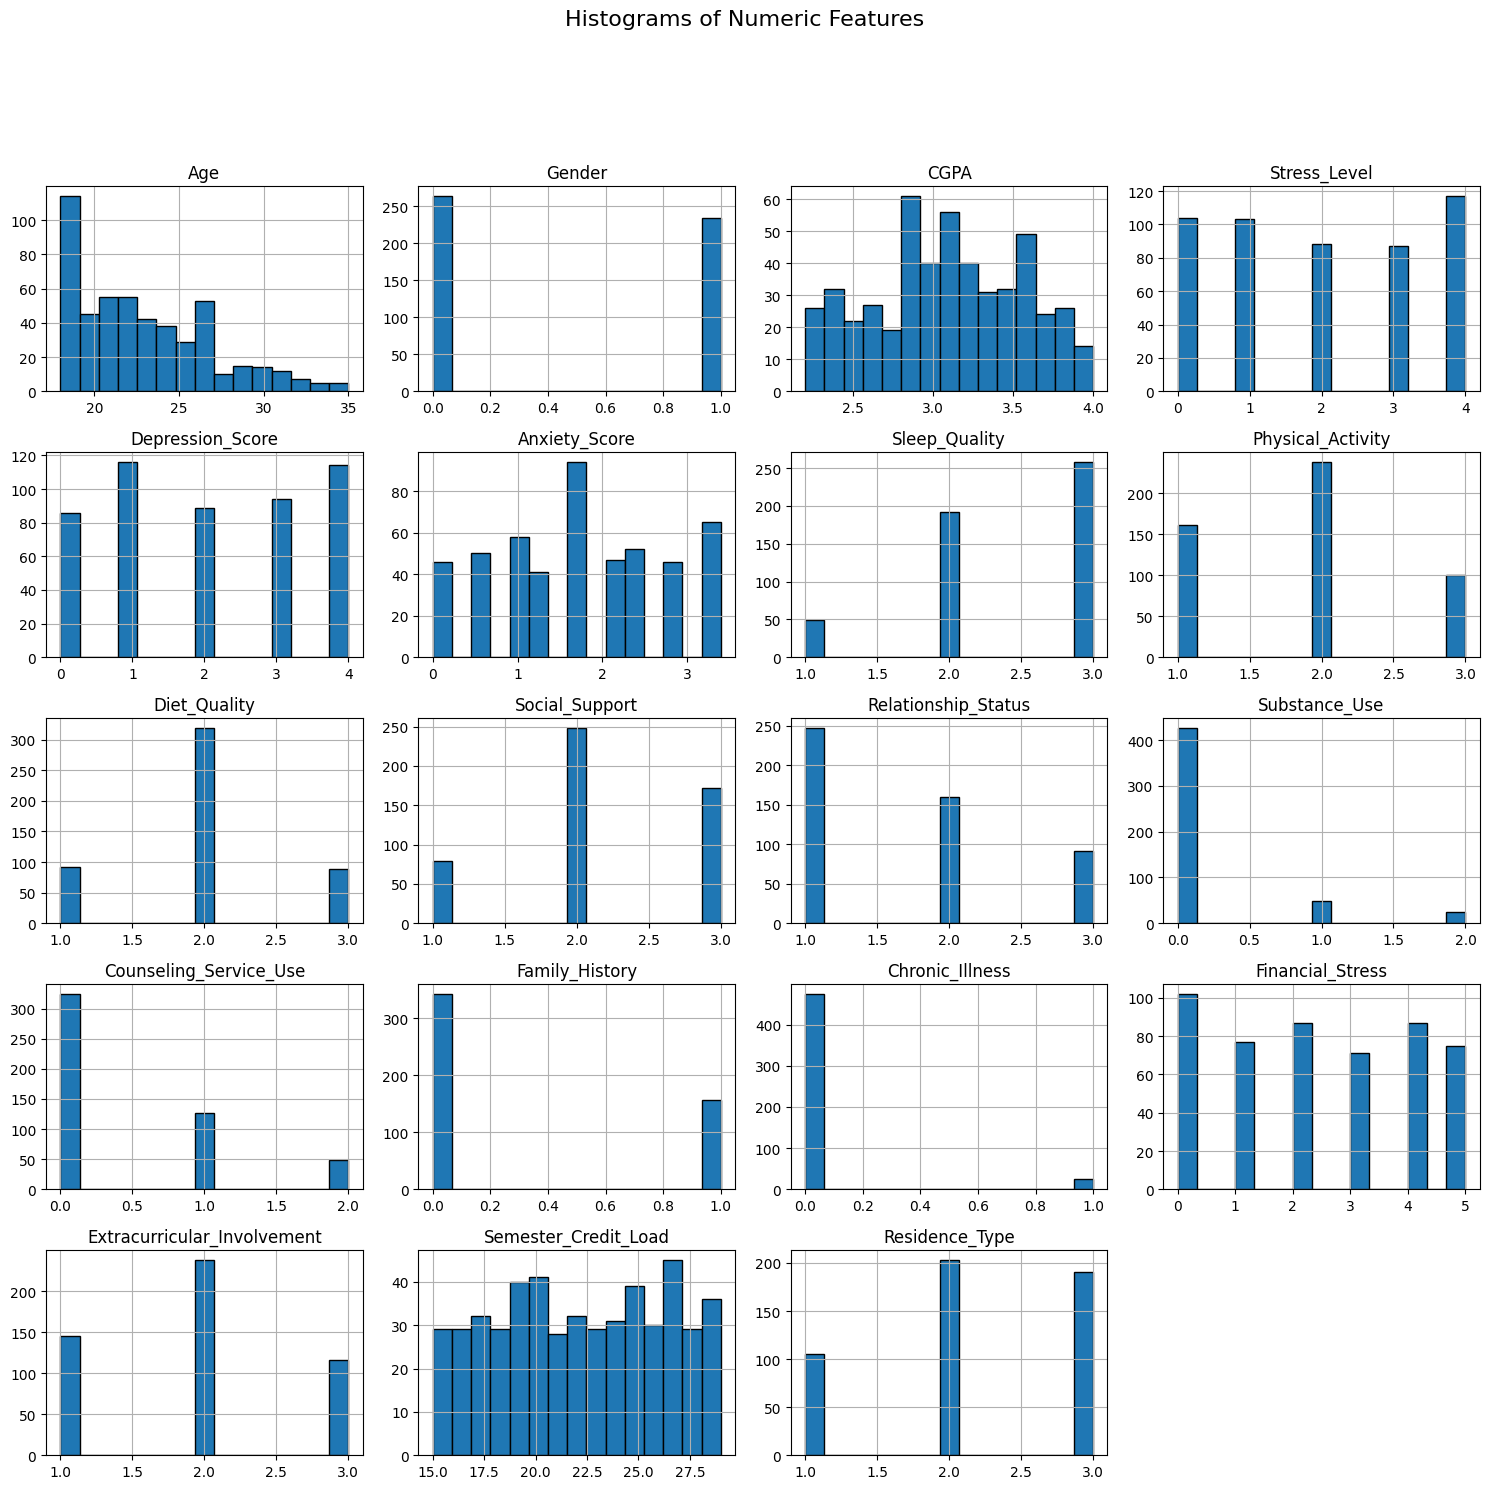

In [ ]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns

df_clean[num_cols].hist(figsize=(15, 15), bins=15, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Pie Chart

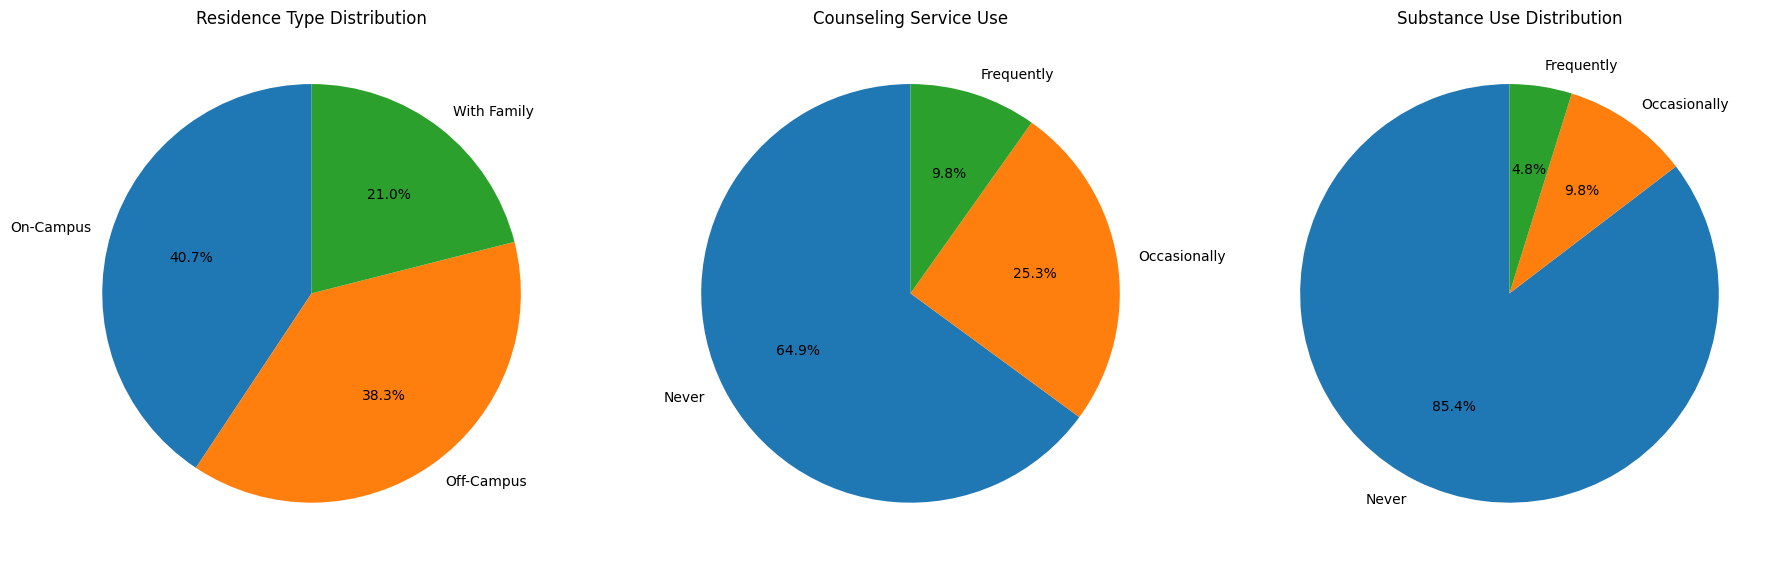

In [ ]:
#subplots for side-by-side pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns

# Residence Type Distribution
residence_counts = df_clean['Residence_Type'].value_counts()
residence_labels = ['On-Campus', 'Off-Campus', 'With Family']
axes[0].pie(residence_counts, labels=residence_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Residence Type Distribution")

# Counseling Service Use Distribution
counseling_counts = df_clean['Counseling_Service_Use'].value_counts()
counseling_labels = ['Never', 'Occasionally', 'Frequently']
axes[1].pie(counseling_counts, labels=counseling_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Counseling Service Use")

# Substance Use Distribution
substance_counts = df_clean['Substance_Use'].value_counts()
substance_labels = ['Never', 'Occasionally', 'Frequently']
axes[2].pie(substance_counts, labels=substance_labels, autopct='%1.1f%%', startangle=90)
axes[2].set_title("Substance Use Distribution")

plt.tight_layout()
plt.show()

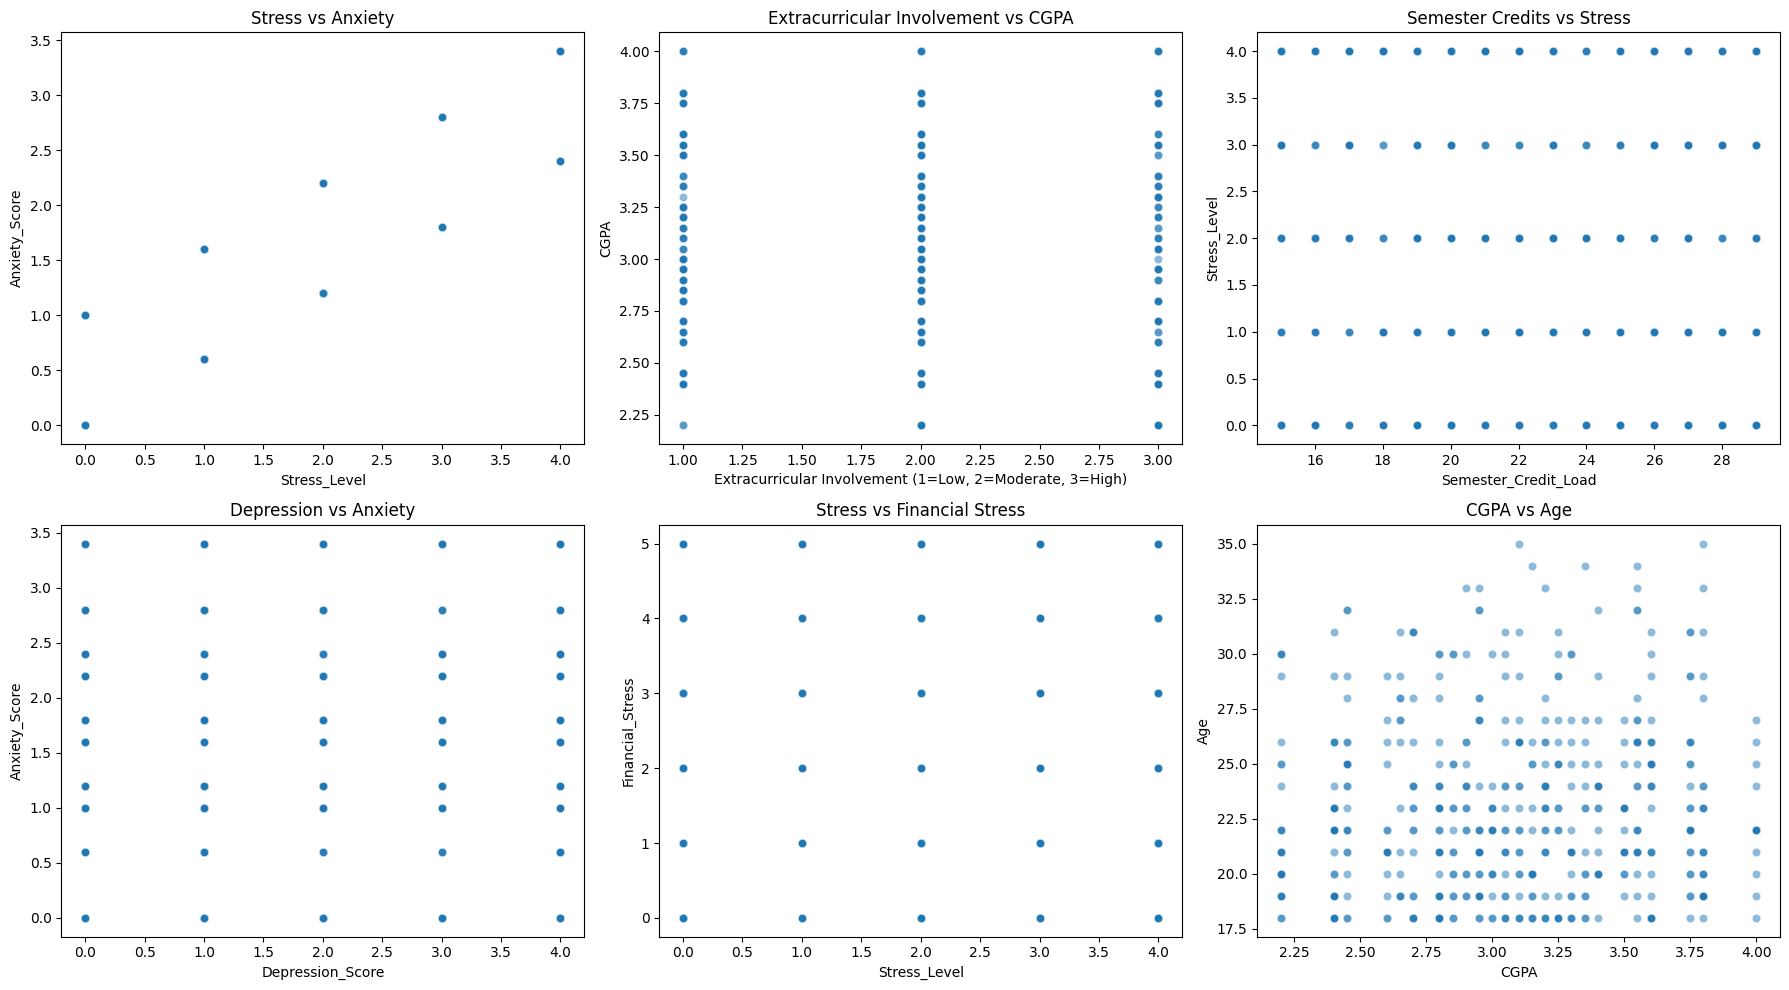

In [ ]:
#subplots for two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) # 2 rows, 3 columns
axes = axes.ravel()

# Stress vs Anxiety
sns.scatterplot(x='Stress_Level', y='Anxiety_Score', data=df_clean, alpha=0.5, ax=axes[0])
axes[0].set_title("Stress vs Anxiety")

# CGPA vs Extracurricular
sns.scatterplot(x='Extracurricular_Involvement', y='CGPA', data=df_clean, alpha=0.5, ax=axes[1])
axes[1].set_title("Extracurricular Involvement vs CGPA")
axes[1].set_xlabel("Extracurricular Involvement (1=Low, 2=Moderate, 3=High)")
axes[1].set_ylabel("CGPA")

# Semester Credits vs Stress
sns.scatterplot(x='Semester_Credit_Load', y='Stress_Level', data=df_clean, alpha=0.5, ax=axes[2])
axes[2].set_title("Semester Credits vs Stress")

# Depression vs Anxiety
sns.scatterplot(x='Depression_Score', y='Anxiety_Score', data=df_clean, alpha=0.5, ax=axes[3])
axes[3].set_title("Depression vs Anxiety")

# Stress vs Financial Stress
sns.scatterplot(x='Stress_Level', y='Financial_Stress', data=df_clean, alpha=0.5, ax=axes[4])
axes[4].set_title("Stress vs Financial Stress")

# CGPA vs Age
sns.scatterplot(x='CGPA', y='Age', data=df_clean, alpha=0.5, ax=axes[5])
axes[5].set_title("CGPA vs Age")


plt.tight_layout()
plt.show()

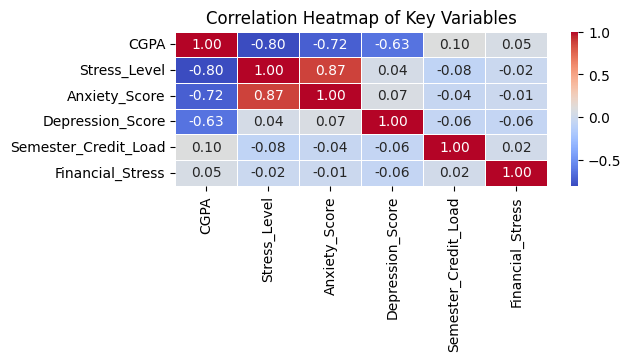

In [ ]:
plt.figure(figsize=(6,2))
corr = df_clean[['CGPA','Stress_Level','Anxiety_Score','Depression_Score','Semester_Credit_Load','Financial_Stress']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Variables")
plt.show()

## Linear Regression Model 1: CGPA vs. Anxiety Score

Model 1: CGPA vs. Anxiety Score
  Intercept (b0): 6.4847
  Slope (b1): -1.5362
  Regression Equation: Anxiety_Score = 6.4847 + (-1.5362) * CGPA
  R-squared (R²): 0.5137


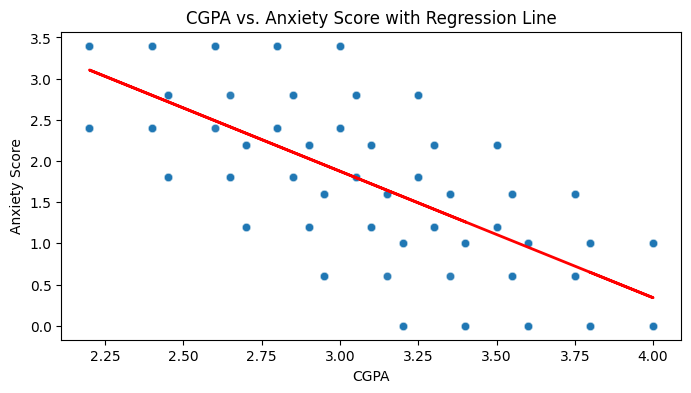

In [ ]:
# Data for Model 1
x = df_clean['CGPA'].to_numpy()
y = df_clean['Anxiety_Score'].to_numpy()

# Manual Linear Regression Calculation
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
b1 = numerator / denominator   # The slope
b0 = y_mean - (b1 * x_mean)    # The intercept

#R-squared Calculation
y_pred = b0 + b1 * x
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Model 1: CGPA vs. Anxiety Score")
print(f"  Intercept (b0): {b0:.4f}")
print(f"  Slope (b1): {b1:.4f}")
print(f"  Regression Equation: Anxiety_Score = {b0:.4f} + ({b1:.4f}) * CGPA")
print(f"  R-squared (R²): {r_squared:.4f}")

# Visualization for Model 1
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.title('CGPA vs. Anxiety Score with Regression Line')
plt.xlabel('CGPA')
plt.ylabel('Anxiety Score')
plt.show()

## Linear Regression Model 2: CGPA vs. Stress Level

Model 2: CGPA vs. Stress Level
  Intercept (b0): 9.6636
  Slope (b1): -2.4806
  Regression Equation: Stress_Level = 9.6636 + (-2.4806) * CGPA
  R-squared (R²): 0.6392


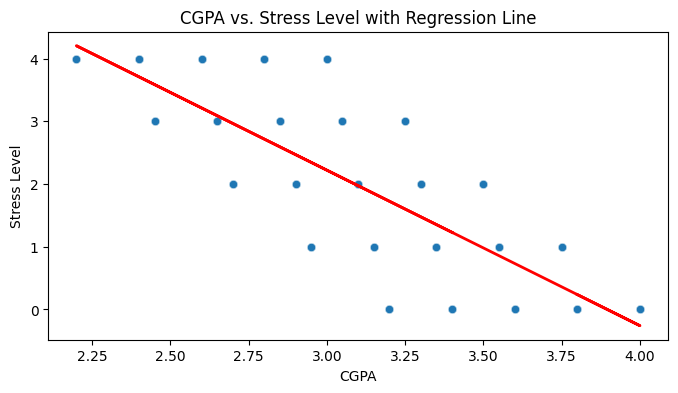

In [ ]:
# Data for Model 2
x = df_clean['CGPA'].to_numpy()
y = df_clean['Stress_Level'].to_numpy()

# Manual Linear Regression Calculation
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
b1 = numerator / denominator   # The slope
b0 = y_mean - (b1 * x_mean)    # The intercept

#R-squared Calculation
y_pred = b0 + b1 * x
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)


print(f"Model 2: CGPA vs. Stress Level")
print(f"  Intercept (b0): {b0:.4f}")
print(f"  Slope (b1): {b1:.4f}")
print(f"  Regression Equation: Stress_Level = {b0:.4f} + ({b1:.4f}) * CGPA")
print(f"  R-squared (R²): {r_squared:.4f}")

# Visualization for Model 2
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.title('CGPA vs. Stress Level with Regression Line')
plt.xlabel('CGPA')
plt.ylabel('Stress Level')
plt.show()

## Linear Regression Model 3: Stress Level vs. Anxiety Score

Model 3: Stress Level vs. Anxiety Score
  Intercept (b0): 0.5361
  Slope (b1): 0.6015
  Regression Equation: Anxiety_Score = 0.5361 + (0.6015) * Stress_Level
  R-squared (R²): 0.7581


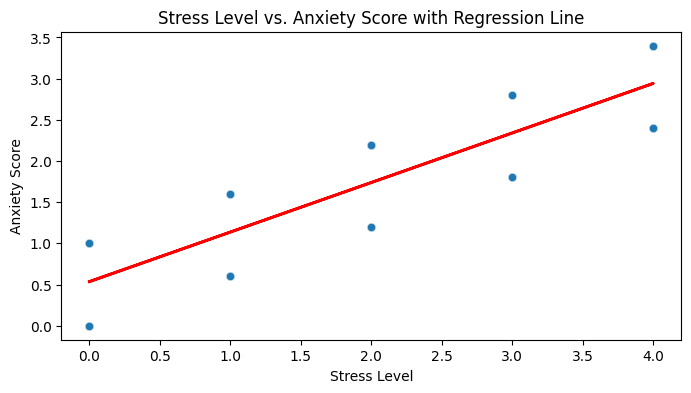

In [ ]:
# Data for Model 3
x = df_clean['Stress_Level'].to_numpy()
y = df_clean['Anxiety_Score'].to_numpy()

# Manual Linear Regression Calculation
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
b1 = numerator / denominator   # The slope
b0 = y_mean - (b1 * x_mean)    # The intercept

# Calculate R-squared
y_pred = b0 + b1 * x
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)


print(f"Model 3: Stress Level vs. Anxiety Score")
print(f"  Intercept (b0): {b0:.4f}")
print(f"  Slope (b1): {b1:.4f}")
print(f"  Regression Equation: Anxiety_Score = {b0:.4f} + ({b1:.4f}) * Stress_Level")
print(f"  R-squared (R²): {r_squared:.4f}")

# Visualization for Model 3
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.title('Stress Level vs. Anxiety Score with Regression Line')
plt.xlabel('Stress Level')
plt.ylabel('Anxiety Score')
plt.show()

## Linear Regression Model 4: Stress Level vs. Depression Score

Model 4: Stress Level vs. Depression Score
  Intercept (b0): 1.9904
  Slope (b1): 0.0385
  Regression Equation: Depression_Score = 1.9904 + (0.0385) * Stress_Level
  R-squared (R²): 0.0016


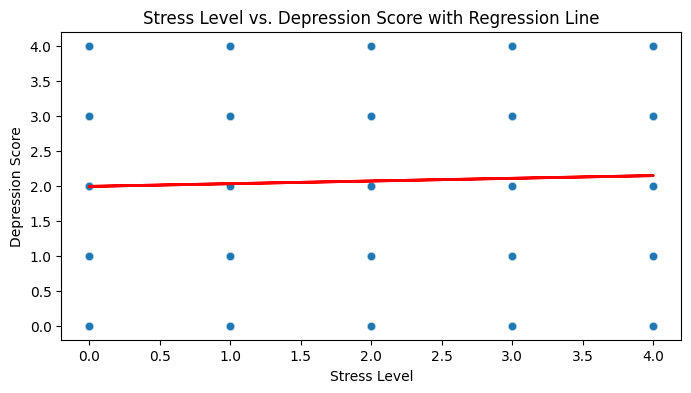

In [ ]:
# Data for Model 4
x = df_clean['Stress_Level'].to_numpy()
y = df_clean['Depression_Score'].to_numpy()

# Manual Linear Regression Calculation
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
b1 = numerator / denominator   # The slope
b0 = y_mean - (b1 * x_mean)    # The intercept

#R-squared Calculation
y_pred = b0 + b1 * x
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)


print(f"Model 4: Stress Level vs. Depression Score")
print(f"  Intercept (b0): {b0:.4f}")
print(f"  Slope (b1): {b1:.4f}")
print(f"  Regression Equation: Depression_Score = {b0:.4f} + ({b1:.4f}) * Stress_Level")
print(f"  R-squared (R²): {r_squared:.4f}")

# Visualization for Model 4
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.title('Stress Level vs. Depression Score with Regression Line')
plt.xlabel('Stress Level')
plt.ylabel('Depression Score')
plt.show()

In [ ]:
x = df_clean['Physical_Activity'].to_numpy()
y = df_clean['Stress_Level'].to_numpy()

x_mean, y_mean = x.mean(), y.mean()
beta1 = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
beta0 = y_mean - beta1*x_mean
y_pred = beta0 + beta1*x
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - y_mean)**2)

print("Stress = {:.3f} + {:.3f} * PhysicalActivity (R²={:.3f})".format(beta0, beta1, r2))

x = df_clean['Physical_Activity'].to_numpy()
y = df_clean['Anxiety_Score'].to_numpy()

x_mean, y_mean = x.mean(), y.mean()
beta1 = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
beta0 = y_mean - beta1*x_mean
y_pred = beta0 + beta1*x
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - y_mean)**2)

print("Anxiety = {:.3f} + {:.3f} * PhysicalActivity (R²={:.3f})".format(beta0, beta1, r2))


Stress = 2.152 + -0.070 * PhysicalActivity (R²=0.001)
Anxiety = 1.787 + -0.019 * PhysicalActivity (R²=0.000)


## Summary of Models and Visualizations

This notebook explores the relationships between various factors and mental health metrics in a student dataset through data cleaning, exploration, and linear regression modeling.

### Data Cleaning and Exploration

*   The dataset was loaded and inspected for missing values and data types.
*   Missing values in 'CGPA' and 'Substance_Use' were handled by dropping the corresponding rows.
*   Categorical variables were encoded into numerical representations for analysis and modeling.
*   Histograms were generated to visualize the distribution of numerical features, including age, CGPA, and mental health scores.
*   Pie charts were created to show the distribution of categorical variables such as Residence Type, Counseling Service Use, and Substance Use.
*   Scatter plots were used to visualize the relationships between pairs of numerical variables, such as Stress vs Anxiety, CGPA vs Extracurricular Involvement, and Semester Credits vs Stress.

### Correlation Analysis

*   A correlation matrix was calculated and visualized as a heatmap to understand the linear relationships between key numerical variables, including mental health scores, CGPA, financial stress, and semester credit load.

### Linear Regression Models

Several linear regression models were manually built to understand the relationships between specific variables:

*   **Model 1: CGPA vs. Anxiety Score:** Explored how CGPA relates to Anxiety Score. The R-squared value indicated a moderate negative linear relationship, meaning lower CGPA is associated with higher Anxiety Scores.
*   **Model 2: CGPA vs. Stress Level:** Examined the relationship between CGPA and Stress Level. This model showed a strong negative linear correlation, suggesting that students with lower CGPA tend to report higher Stress Levels.
*   **Model 3: Stress Level vs. Anxiety Score:** Analyzed the direct relationship between Stress Level and Anxiety Score. This model demonstrated a strong positive linear correlation, indicating that higher Stress Levels are associated with higher Anxiety Scores.
*   **Model 4: Stress Level vs. Depression Score:** Investigated the relationship between Stress Level and Depression Score. This model had a very low R-squared value, suggesting a weak linear relationship between these two variables in this dataset.

Overall, the visualizations and models highlight some key relationships within the dataset, particularly the strong inverse correlation between CGPA and stress/anxiety, and the strong positive correlation between stress and anxiety.